    Autoregressive moving average model or ARMA(p,q)
    
    Now we encounter a case where we cannot infer an order from the ACF plot or from the PACF plot.
    
    This means both the plot exhibit a slowly decaying pattern or sinusoidal pattern.
    
    ARMA is combination of both the autoregressive and moving average processes.
    
    We will define a general modeling procedure that will allow us to model such complex time series. This procedure involves model selection using the Akaike information criterion (AIC), which will determine the optimal combination of p and q for our series.
    
    We perform residual analysis for validating model.

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file!
df = pd.read_csv('dataset/bandwidth.csv')

# Display the first 1st rows of 'df'
df.head()

,hourly_bandwidth
0,1000.496714
1,1000.969408
2,1002.046019
3,1004.702118
4,1007.447816


In [15]:
df.shape

(10000, 1)

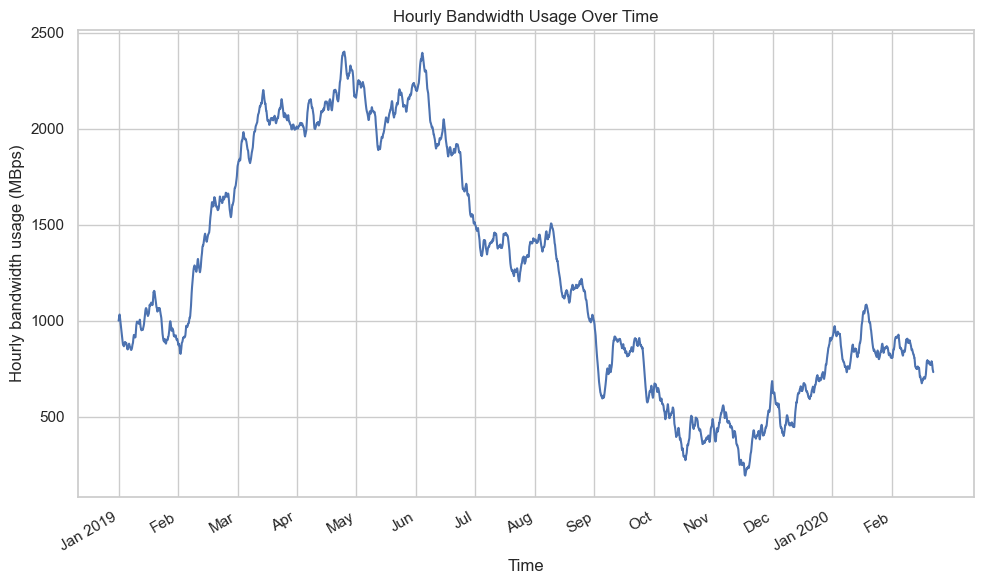

In [4]:
sns.set(style="whitegrid")

# Create the figure and axis using Seaborn's sns.lineplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df, x=df.index, y='hourly_bandwidth', ax=ax)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth usage (MBps)')
ax.set_title('Hourly Bandwidth Usage Over Time')

# Customize the x-axis tick positions and labels
x_ticks = np.arange(0, 10000, 730)
x_labels = ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Auto-format the x-axis date
fig.autofmt_xdate()

# Ensure a tight layout
plt.tight_layout()
 
plt.show()

In [7]:
# test for stationary

from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['hourly_bandwidth'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.8714653199452776
p-value: 0.7972240255014538


    Inference:
        ADF statistic is not a large negative number, and the p-value is greater than 0.05.

        Hence : time series is not stationary!

    Transformation of time series data to stationary by differencing techinque.

In [6]:
# 1st order differencing

bandwidth_diff = np.diff(df.hourly_bandwidth, n=1)

df_dbandwidth_diff = pd.DataFrame({'bandwidth_diff' : bandwidth_diff})

In [9]:
ADF_result = adfuller(df_dbandwidth_diff['bandwidth_diff'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -20.694853863789007
p-value: 0.0


    Inference:
        ADF statistic is a large negative number, and the p-value is smaller than 0.05.
    
        Hence : time series is stationary!

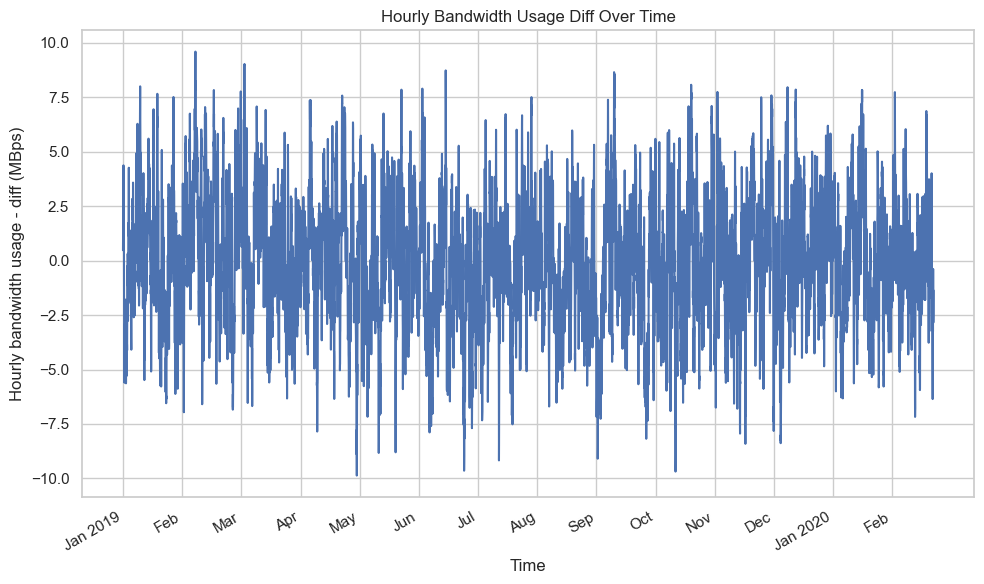

In [10]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the figure and axis using Seaborn's sns.lineplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=bandwidth_diff, ax=ax)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Hourly bandwidth usage - diff (MBps)')
ax.set_title('Hourly Bandwidth Usage Diff Over Time')

# Customize the x-axis tick positions and labels
x_ticks = np.arange(0, len(bandwidth_diff), 730)
x_labels = ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb']
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha="right")

# Auto-format the x-axis date
fig.autofmt_xdate()

# Ensure a tight layout
plt.tight_layout()

# Show the plot (optional)
plt.show()

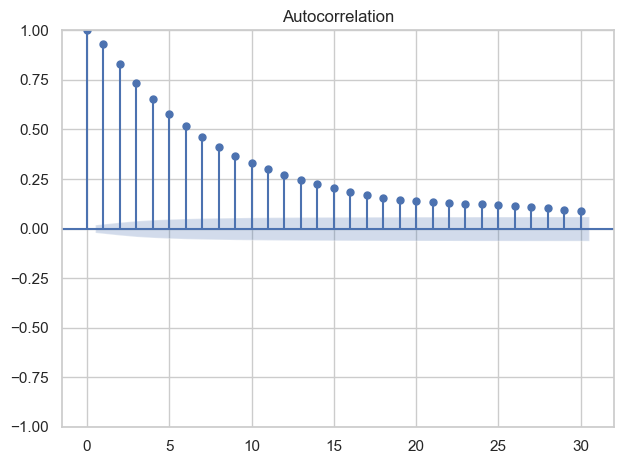

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

#Plot the ACF of the differenced series.
plot_acf(df_dbandwidth_diff['bandwidth_diff'], lags=30);

plt.tight_layout()

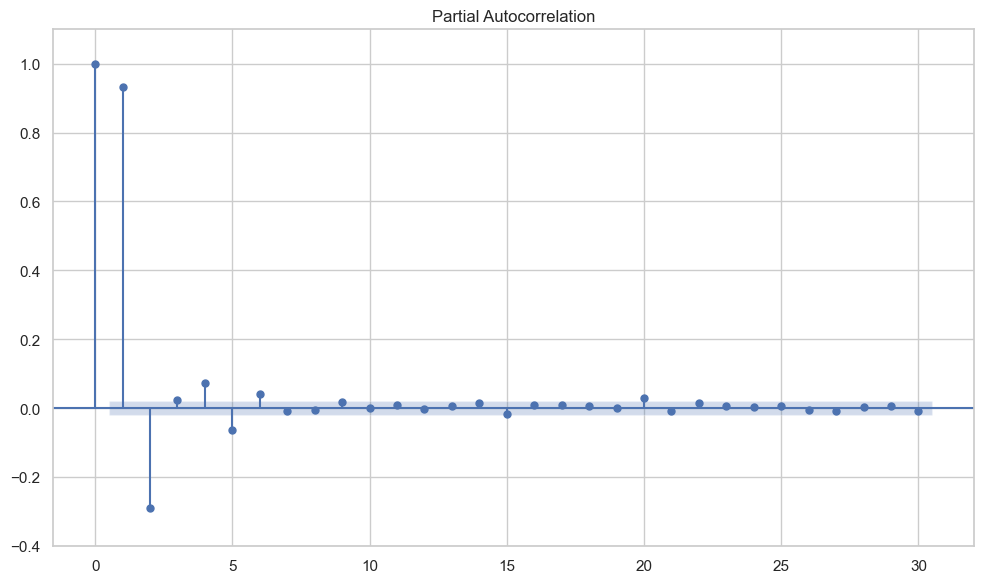

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(10, 6))

#Plot the ACF of the differenced series.
plot_pacf(df_dbandwidth_diff['bandwidth_diff'], lags=30, ax=ax);

ax.set_ylim(-0.4, 1.1)

plt.tight_layout()